In [33]:
import pandas as pd
import seaborn as sns
import numpy as np
import requests
import matplotlib.pyplot as plt
df = pd.read_json("gme.json")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5600 entries, 0 to 5599
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5600 non-null   datetime64[ns]
 1   Open       5600 non-null   float64       
 2   High       5600 non-null   float64       
 3   Low        5600 non-null   float64       
 4   Close      5600 non-null   float64       
 5   Adj Close  5600 non-null   float64       
 6   Volume     5600 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 306.4 KB


the variables found in this data set are 
date, which is the day we observe the stock, 
open, the price of the stock when the market opens, 
high, the highest recoorded price, 
low, the lowest recorded price, 
close, the price when the market closes, 
adj close, which is adjusted price of a stock when the market closes. 
and volume, the number of stocks being traded in

In [3]:
df[df["High"] == df ["High"].max()]

,Date,Open,High,Low,Close,Adj Close,Volume
4772,2021-01-28,66.25,120.75,28.0625,48.400002,48.400002,235263200


In [4]:
count = 0
total = 0
for month in range(1, 13):
    for i in range(len(df)):
        if df.loc[i]["Date"].month == month:
            avg = (df.loc[i]["High"] + df.loc[i]["Low"]) / 2
            total += avg
            count += 1
total/count

9.233137054107122

In [5]:
df.loc[0]["Date"].day

13

<AxesSubplot:xlabel='Volume', ylabel='Low'>

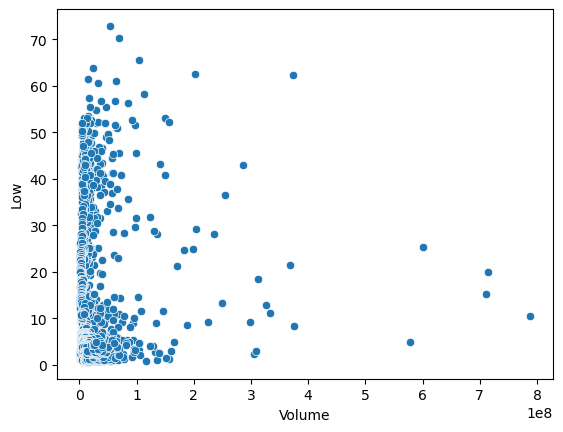

In [6]:
sns.scatterplot(data=df, x="Volume", y="Low")

In [7]:
df["Low"].corr(df["Volume"])

0.10259646883179027

<AxesSubplot:xlabel='Date', ylabel='High'>

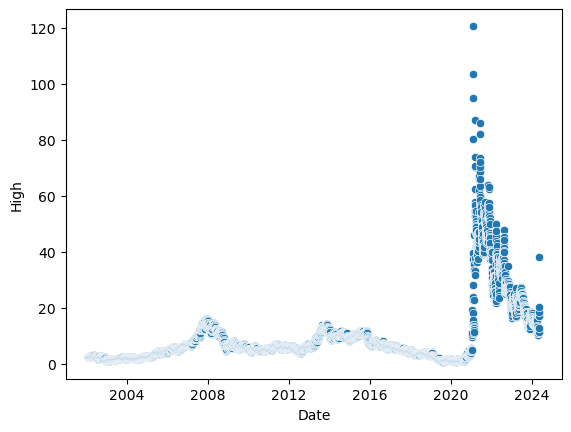

In [8]:
sns.scatterplot(data=df, x="Date", y="High")

<AxesSubplot:xlabel='Date', ylabel='Log High'>

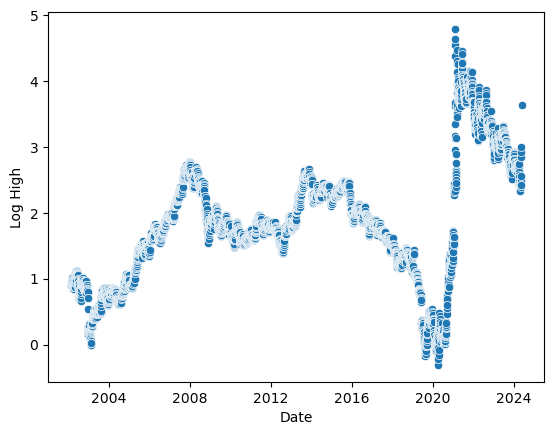

In [9]:
log_high = np.log(df["High"])
df["Log High"] = log_high
sns.scatterplot(data=df, x="Date", y="Log High")

In [10]:
df['numeric_time'] = pd.to_datetime(df['Date']).astype('int64') // 10**9 
correlation = df['numeric_time'].corr(df['Log High'])

In [11]:
correlation

0.45097470030936626

In [12]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Log High', 'numeric_time'],
      dtype='object')

In [13]:
df['Date'] = pd.to_datetime(df['Date'])
latest_date = df['Date'].max()
print("The latest date in the dataset is:", latest_date)

The latest date in the dataset is: 2024-05-13 00:00:00


In [14]:
years = {} 
for i in range(len(df)):
    year = df.loc[i]["Date"].year
    if year not in years.keys() and year != 2024:
        years[year] = 1
    elif year in years.keys() and year != 2024:
        years[year] += 1
sum(years.values())/len(years)

250.36363636363637

In [15]:
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=IBM&interval=5min&apikey=ZEK7RZHZ5MT4DNSN'
r = requests.get(url)
data = r.json()

print(data)

{'Meta Data': {'1. Information': 'Intraday (5min) open, high, low, close prices and volume', '2. Symbol': 'IBM', '3. Last Refreshed': '2024-09-30 19:55:00', '4. Interval': '5min', '5. Output Size': 'Compact', '6. Time Zone': 'US/Eastern'}, 'Time Series (5min)': {'2024-09-30 19:55:00': {'1. open': '220.5400', '2. high': '220.5400', '3. low': '220.4000', '4. close': '220.4000', '5. volume': '53'}, '2024-09-30 19:50:00': {'1. open': '221.0800', '2. high': '221.0800', '3. low': '221.0800', '4. close': '221.0800', '5. volume': '5'}, '2024-09-30 19:45:00': {'1. open': '220.5000', '2. high': '220.5000', '3. low': '220.5000', '4. close': '220.5000', '5. volume': '10'}, '2024-09-30 19:30:00': {'1. open': '220.8600', '2. high': '220.8600', '3. low': '220.8600', '4. close': '220.8600', '5. volume': '7'}, '2024-09-30 19:25:00': {'1. open': '221.0800', '2. high': '221.0800', '3. low': '221.0800', '4. close': '221.0800', '5. volume': '14'}, '2024-09-30 19:10:00': {'1. open': '221.0800', '2. high': '

In [16]:
example = pd.DataFrame(data['Time Series (5min)'])
example.head()

,2024-09-30 19:55:00,2024-09-30 19:50:00,2024-09-30 19:45:00,2024-09-30 19:30:00,2024-09-30 19:25:00,2024-09-30 19:10:00,2024-09-30 19:00:00,2024-09-30 18:55:00,2024-09-30 18:50:00,2024-09-30 18:45:00,...,2024-09-30 11:25:00,2024-09-30 11:20:00,2024-09-30 11:15:00,2024-09-30 11:10:00,2024-09-30 11:05:00,2024-09-30 11:00:00,2024-09-30 10:55:00,2024-09-30 10:50:00,2024-09-30 10:45:00,2024-09-30 10:40:00
1. open,220.5400,221.0800,220.5000,220.8600,221.0800,221.0800,221.0800,220.4000,220.8800,220.3300,...,221.0287,220.9500,220.8599,220.5609,220.8500,220.8200,220.7500,221.0100,220.9300,221.0800
2. high,220.5400,221.0800,220.5000,220.8600,221.0800,221.0800,221.0800,220.4500,220.8800,220.8900,...,221.0287,221.0700,221.0300,220.8100,220.9050,221.0700,220.9300,221.0250,221.2500,221.1550
3. low,220.4000,221.0800,220.5000,220.8600,221.0800,221.0800,220.4100,220.4000,220.3300,220.3300,...,220.6700,220.8800,220.7700,220.5609,220.6000,220.8200,220.6100,220.6700,220.9300,220.8700
4. close,220.4000,221.0800,220.5000,220.8600,221.0800,221.0800,220.4100,220.4500,220.3700,220.8900,...,220.6700,221.0000,221.0000,220.8100,220.6000,220.9476,220.8200,220.8200,221.0475,220.9250
5. volume,53,5,10,7,14,2,858651,77,143,232,...,10063,21110,22184,9241,9897,11100,76348,14610,15745,15004


In [17]:
def gather_data(start, end):
    '''
    Request a json payload from Polygon.io for each day within the timeframe, described by
    {start} and {end}.
    Once I get json for a day, I need to add it to a dictionary before returning the dataframe.
    '''
    # Create dictionary for final dataframe
    data = {"Date": [],"Open": [],"High": [],"Low": [],"Close": [],"Volume": []}
    
    # Get the month as a number to iterate through timespan
    startMonth = pd.to_datetime(start).month
    endMonth = pd.to_datetime(end).month
    
    # Iterate through timespan
    for month in range(startMonth, endMonth + 1):
        # Get most of days in month
        for day in range(1, 26):
            # Create string of date for URL
            if day < 10:
                current = '2024-0' + str(month) + '-0' + str(day)
            else:
                current = '2024-0' + str(month) + '-0' + str(day) 
            
            # Make request
            url = 'https://api.polygon.io/v1/open-close/GME/' + current + '?adjusted=false&apiKey=pqM3pnssdX3a9Ps3whjdxguDpbElVPfg'
            r = requests.get(url)
            jsonData = r.json()
            
            # Add date-specific data to dictionary
            data["Open"].append(jsonData['open'])
            data["High"].append(jsonData['high'])
            data["Low"].append(jsonData["low"])
            data["Close"].append(jsonData['close'])
            data["Volume"].append(jsonData['volume'])
            date = pd.to_datetime(current)
            data["Date"].append(date)
    
        # Remove break statements if you want to make multiple requests
            break
        break
    
    # return dataframe of data
    return pd.DataFrame(data)

In [18]:
gather_data('2024-05-14', '2024-09-26')

,Date,Open,High,Low,Close,Volume
0,2024-05-01,11.03,11.32,10.7,10.91,2631514.0


In [21]:
df.head()

,Date,Open,High,Low,Close,Volume,Log High,numeric_time
0,2002-02-13,2.40625,2.51500,2.38125,2.51250,76216000,0.922273,1013558400
1,2002-02-14,2.54375,2.54875,2.48125,2.50000,11021600,0.935603,1013644800
2,2002-02-15,2.50000,2.50625,2.46250,2.48750,8389600,0.918788,1013731200
3,2002-02-19,2.47500,2.47500,2.34375,2.38750,7410400,0.906240,1014076800
4,2002-02-20,2.40000,2.46875,2.38125,2.46875,6892800,0.903712,1014163200


KeyError: "['Adj Close'] not found in axis"

In [22]:
amc = pd.read_csv("AMC.csv")

In [23]:
amc.drop(["Adj Close"], inplace=True, axis=1)

In [24]:
amc["Date"] = pd.to_datetime(amc["Date"])

In [25]:
type(amc.loc[0]["Date"])

pandas._libs.tslibs.timestamps.Timestamp

<AxesSubplot:xlabel='Date', ylabel='High'>

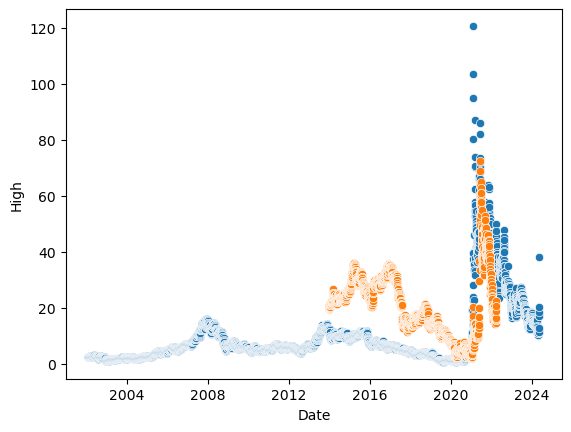

In [26]:
sns.scatterplot(data=df, x="Date", y="High")
sns.scatterplot(data=amc, x="Date", y="High")

In [27]:
wsb = pd.read_json("light_encode_wsb.json")
wsb.head()

,label,timestamp,score,comms_num
0,AMC,2021-01-28,38408,6027
1,AMC,2021-01-29,22404,7023
2,AMC,2021-01-30,66084,11660
3,AMC,2021-01-31,54180,6934
4,AMC,2021-02-01,122882,8710


In [28]:
wsb.rename(columns={"timestamp":"Date"}, inplace=True)

In [29]:
amc_wsb = wsb[wsb["label"] == "AMC"]
amc_wsb["label"].unique()

array(['AMC'], dtype=object)

In [30]:
merged_amc = pd.merge(amc, amc_wsb, how="inner", on="Date")

In [31]:
merged_amc.head()

,Date,Open,High,Low,Close,Volume,label,score,comms_num
0,2021-01-28,11.98,16.50,6.51,8.63,591223900,AMC,38408,6027
1,2021-01-29,14.31,16.00,11.60,13.26,602193300,AMC,22404,7023
2,2021-02-01,17.00,17.25,12.91,13.30,434608000,AMC,122882,8710
3,2021-02-02,9.48,10.10,6.00,7.82,462775900,AMC,16928,3338
4,2021-02-03,8.85,9.77,7.89,8.97,221405100,AMC,97207,7629


In [32]:
merged_amc["comms_num_log"] = np.log(merged_amc["comms_num"])

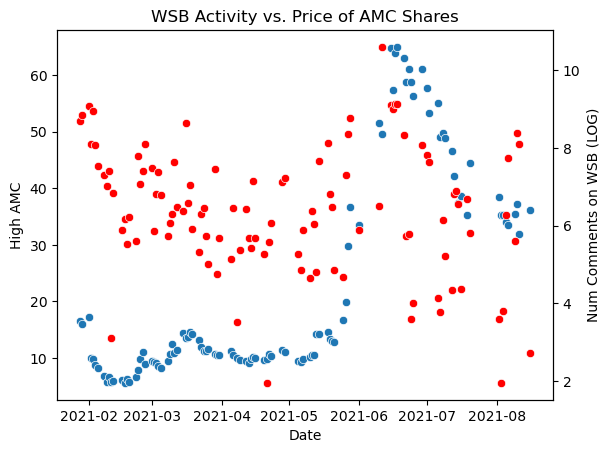

In [34]:
ax1 = sns.scatterplot(data=merged_amc, x="Date", y="High")
ax2 = ax1.twinx()
sns.scatterplot(data=merged_amc, x='Date', y='comms_num_log', ax=ax2, color='red')
ax1.set_ylabel('High AMC')
ax2.set_ylabel('Num Comments on WSB (LOG)')
plt.title('WSB Activity vs. Price of AMC Shares')

plt.show()

<AxesSubplot:xlabel='Date', ylabel='High'>

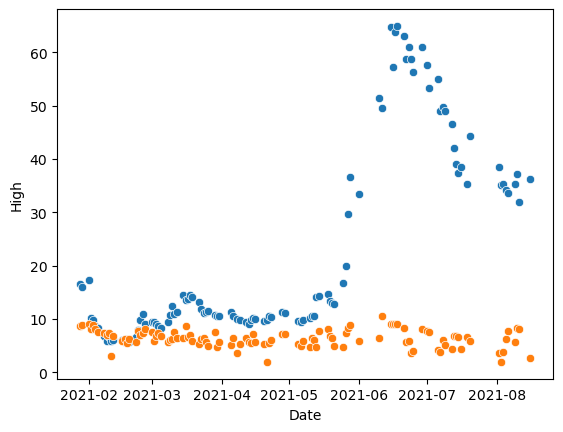

In [35]:
sns.scatterplot(data=merged_amc, x="Date", y="High")
sns.scatterplot(data=merged_amc, x="Date", y="comms_num_log")